## ДЗ №3. Тамогашев Кирилл

## Парадокс инспектора.

In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')  
%matplotlib inline

In [266]:
def one_day():
   time = [0]
   c = 0
   while c < 720:
       c += int((np.random.binomial(1, 0.5, 1) * 5) + 5)
       time.append(c)
   return np.array(time)

simulation = []
for _ in range(0, 10000):
    simulation.append(one_day())
simulation = np.array(simulation)

In [267]:
number_of_buses = np.zeros((10000, ))
for i in range(10000):
    number_of_buses[i] = len(simulation[i])
mean = np.mean(number_of_buses)
std = np.std(number_of_buses)

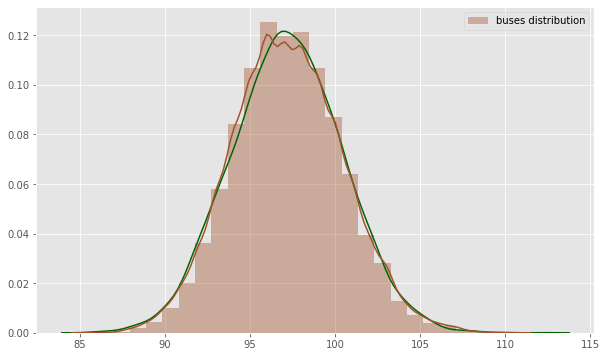

In [270]:
n_bins = len(set(number_of_buses))
normal = np.random.normal(loc=mean,scale=std, size=10000)

plt.figure(figsize=(10, 6))
sns.distplot(normal,  bins=n_bins, hist=False, color='darkgreen')
sns.distplot(number_of_buses,  bins=n_bins, color='sienna')
plt.legend(labels=['busses distribution'])
plt.show()

Инспектор Тимон и его наблюдения:

In [242]:
def number_of_passanges_by_Timon(sample):
    everyone = np.zeros((10000, ))
    for i in range(10000):
        bun_of_pass = np.zeros(len(sample[i])-1)
        for j in range(len(sample[i])-1):
            bun_of_pass[j] = sample[i][j+1] - sample[i][j]
        passangers = np.random.choice(bun_of_pass, 1)
        everyone[i] = passangers
    return everyone

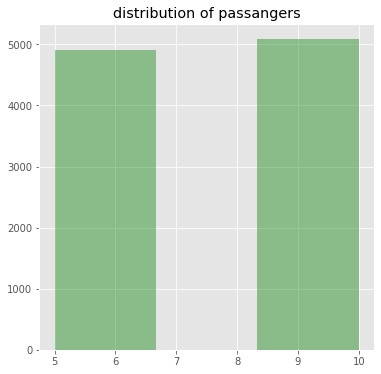

mean of Timon: 7.543
 std of Timon: 2.4996301726455457 


In [311]:
num_tiomon = number_of_passanges_by_Timon(simulation)
plt.figure(figsize=(6, 6))
sns.distplot(num_tiomon, bins=3, kde=False, color='g')
plt.title('distribution of passangers')
plt.show()
print(f"mean of Timon: {np.mean(num_tiomon)}")
print(f" std of Timon: {np.std(num_tiomon)} ")

Инспектор Пумба и его наблюдения:

In [503]:
def number_of_passanges_by_Pumba(sample):
    everyone = np.zeros((10000, ))
    for i in range(10000):
        sam = sample[i]
        time_to_come = np.random.uniform(0, 720, 1)
        do = sam[(sam > time_to_come - 100) & (sam < time_to_come)]
        do = do[::-1]
        posle = sam[(sam < time_to_come + 100) & (sam > time_to_come)]
        passangers = posle[0] - do[0]
        everyone[i] = passangers
    return everyone

In [492]:
sam = simulation[1]
sam

array([  0,   5,  10,  20,  25,  30,  35,  45,  55,  65,  75,  80,  90,
       100, 105, 110, 115, 120, 130, 135, 145, 155, 165, 170, 180, 190,
       200, 205, 215, 220, 230, 240, 245, 250, 255, 260, 270, 275, 285,
       295, 300, 305, 310, 315, 325, 330, 335, 340, 345, 350, 355, 360,
       370, 380, 385, 395, 405, 410, 420, 425, 430, 435, 440, 450, 460,
       465, 470, 480, 485, 490, 500, 505, 510, 520, 530, 535, 545, 555,
       565, 570, 580, 585, 590, 595, 605, 610, 620, 625, 630, 635, 640,
       650, 655, 660, 665, 670, 675, 680, 690, 700, 710, 715, 725])

In [504]:
time_to_come = np.random.uniform(0, 720, 1)
do = sam[(sam > time_to_come - 100) & (sam < time_to_come)]
do = do[::-1]
posle = sam[(sam < time_to_come + 100) & (sam > time_to_come)]

In [499]:
print(time_to_come)
print(do[0], posle[0])

[163.33675176]
155 165


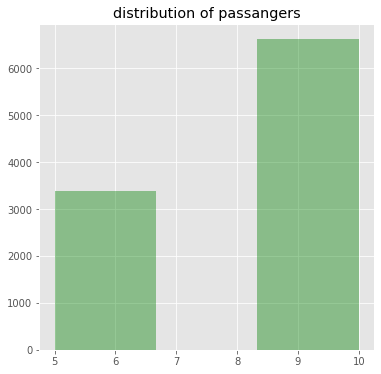

mean of Pumba: 8.309
 std of Pumba: 2.365484939711094 


In [505]:
num_pumba = number_of_passanges_by_Pumba(simulation)
plt.figure(figsize=(6, 6))
sns.distplot(num_pumba, bins=3, kde=False, color='g')
plt.title('distribution of passangers')
plt.show()
print(f"mean of Pumba: {np.mean(num_pumba)}")
print(f" std of Pumba: {np.std(num_pumba)} ")

Теперь используем Экспоненциальное распределение

In [301]:
def new_one_day():
   time = [0]
   c = 0
   while c < 720:
       c += int(np.random.exponential(scale=10, size=1))
       time.append(c)
   return np.array(time)

new_simulation = []
for i in range(0, 10000):
    new_simulation.append(new_one_day())
new_simulation = np.array(new_simulation)

In [302]:
number_of_buses = np.zeros((10000, ))
for i in range(10000):
    number_of_buses[i] = len(new_simulation[i])
mean = np.mean(number_of_buses)
std = np.std(number_of_buses)

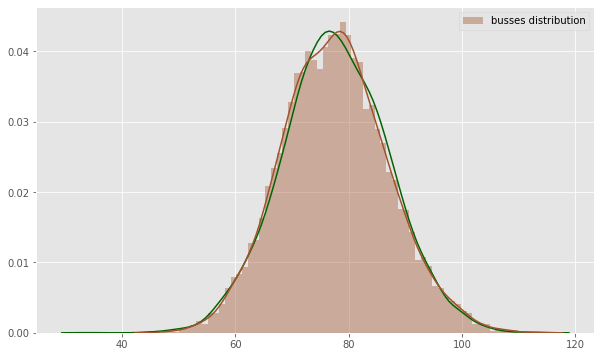

In [303]:
n_bins = len(set(number_of_buses))
normal = np.random.normal(loc=mean,scale=std, size=10000)

plt.figure(figsize=(10, 6))
sns.distplot(normal,  bins=n_bins, hist=False, color='darkgreen')
sns.distplot(number_of_buses,  bins=n_bins, color='sienna')
plt.legend(labels=['busses distribution'])
plt.show()

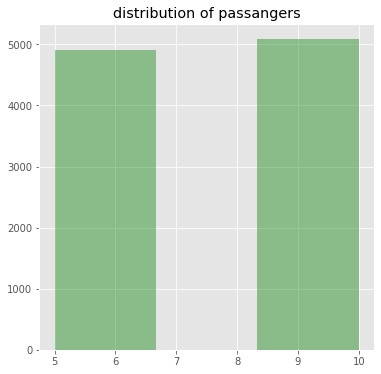

new mean of Timon: 9.6575
 new std of Timon: 10.231236178976616 


In [323]:
num_tiomon_new = number_of_passanges_by_Timon(new_simulation)
plt.figure(figsize=(6, 6))
sns.distplot(num_tiomon, bins=3, kde=False, color='g')
plt.title('distribution of passangers')
plt.show()
print(f"new mean of Timon: {np.mean(num_tiomon_new)}")
print(f" new std of Timon: {np.std(num_tiomon_new)} ")

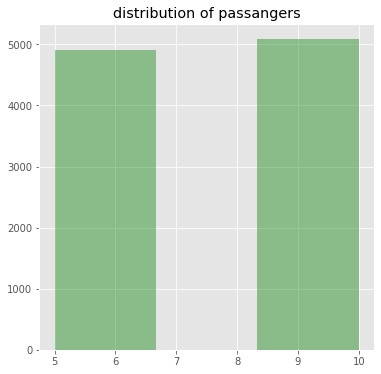

new mean of Pumba: 19.9091
 new std of Pumba: 14.155706877086711 


In [324]:
num_pumba_new = number_of_passanges_by_Pumba(new_simulation)
plt.figure(figsize=(6, 6))
sns.distplot(num_tiomon, bins=3, kde=False, color='g')
plt.title('distribution of passangers')
plt.show()
print(f"new mean of Pumba: {np.mean(num_pumba_new)}")
print(f" new std of Pumba: {np.std(num_pumba_new)} ")

Заметим, что в обоих случаях мат. ожидание Пумбы больше, чем мат. ожидание Тимона, так как Пумба с большей вероятностью попадает на более долгие по продолжительности участки ожидания. Это подтверждает парадокс 

## Парадокс Хуана Мануэля Родригеса Паррондо

In [65]:
def casino_A():
    return int(np.random.binomial(1, 0.49, 1) * 2 - 1)

In [66]:
def casino_B(c):
    if c % 3 == 0:
        return int(np.random.binomial(1, 0.09, 1) * 2 - 1)
    else:
        return int(np.random.binomial(1, 0.74, 1) * 2 - 1)

In [67]:
def m_Atos():
    atos = [1000]
    c = 1000
    for _ in range(1000):
        c += casino_A()
        atos.append(c)
    return np.array(atos)

In [68]:
atos_sample = []
for _ in range(10000):
        atos_sample.append(m_Atos())
atos_sample = np.array(atos_sample)

In [69]:
thousand = np.full(1000, 1000)
idxs = np.random.choice(10000, 10)

In [73]:
mean_a = np.mean(atos_sample, axis=0)

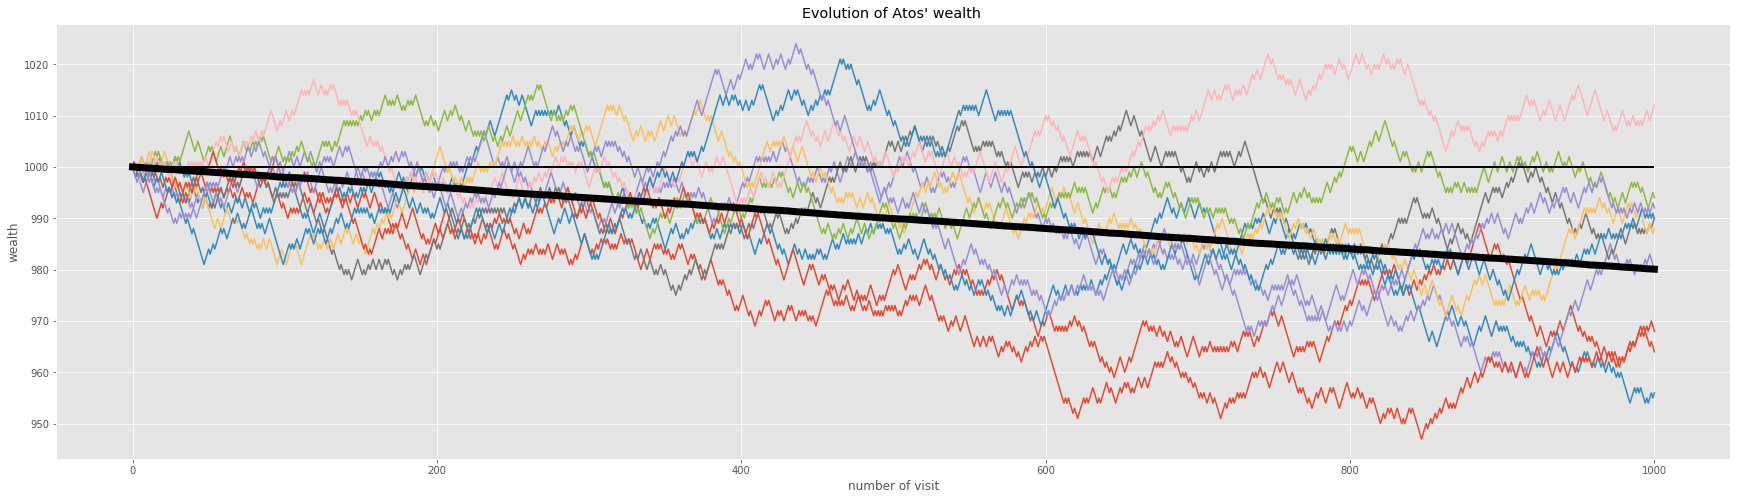

In [74]:
plt.figure(figsize=(30, 8))
plt.plot(atos_sample[idxs[0]])
plt.plot(atos_sample[idxs[1]])
plt.plot(atos_sample[idxs[2]])
plt.plot(atos_sample[idxs[3]])
plt.plot(atos_sample[idxs[4]])
plt.plot(atos_sample[idxs[5]])
plt.plot(atos_sample[idxs[6]])
plt.plot(atos_sample[idxs[7]])
plt.plot(atos_sample[idxs[8]])
plt.plot(atos_sample[idxs[9]])
plt.plot(mean_a, lw=7, color='black')
plt.plot(thousand, lw=2, color='black')
plt.title("Evolution of Atos' wealth ")
plt.xlabel('number of visit')
plt.ylabel('wealth')
plt.show()

In [75]:
def m_Portos():
    portos = [1000]
    c = 1000
    for _ in range(1000):
        c += casino_B(c)
        portos.append(c)
    return portos
    

In [76]:
portos_sample = []
for _ in range(10000):
        portos_sample.append(m_Portos())
portos_sample = np.array(portos_sample)

In [78]:
mean_p = np.mean(portos_sample, axis=0)

In [85]:
idxs = np.random.choice(10000, 10)

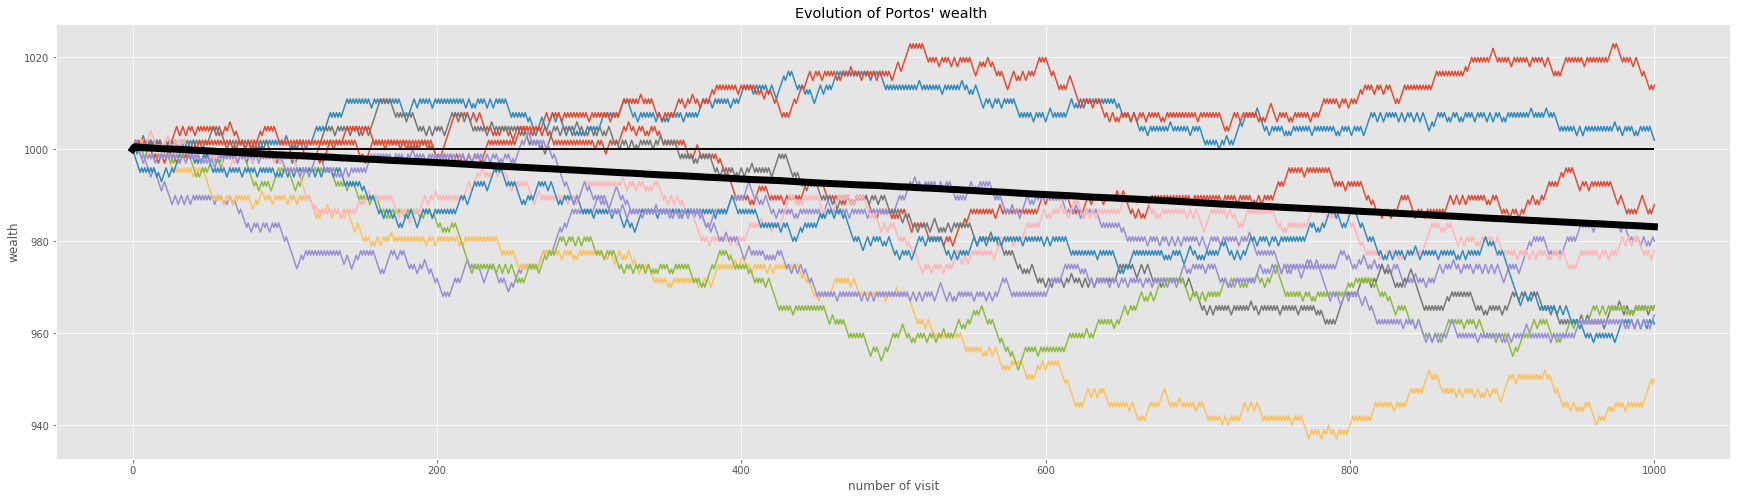

In [86]:
plt.figure(figsize=(30, 8))
plt.plot(portos_sample[idxs[0]])
plt.plot(portos_sample[idxs[1]])
plt.plot(portos_sample[idxs[2]])
plt.plot(portos_sample[idxs[3]])
plt.plot(portos_sample[idxs[4]])
plt.plot(portos_sample[idxs[5]])
plt.plot(portos_sample[idxs[6]])
plt.plot(portos_sample[idxs[7]])
plt.plot(portos_sample[idxs[8]])
plt.plot(portos_sample[idxs[9]])
plt.plot(mean_p, lw=7, color='black')
plt.plot(thousand, lw=2, color='black')
plt.title("Evolution of Portos' wealth ")
plt.xlabel('number of visit')
plt.ylabel('wealth')
plt.show()

In [80]:
def m_Aramis():
    aramis = [1000]
    c = 1000
    for _ in range(1000):
        chance = int(np.random.binomial(1, 0.5, 1))
        if chance == 1:
            c += casino_A()
        elif chance == 0:
            c += casino_B(c)
        aramis.append(c)
    return aramis

In [81]:
aramis_sample = []
for _ in range(10000):
        aramis_sample.append(m_Aramis())
aramis_sample = np.array(aramis_sample)

In [82]:
mean_aram = np.mean(aramis_sample, axis=0)

In [89]:
idxs = np.random.choice(10000, 10)

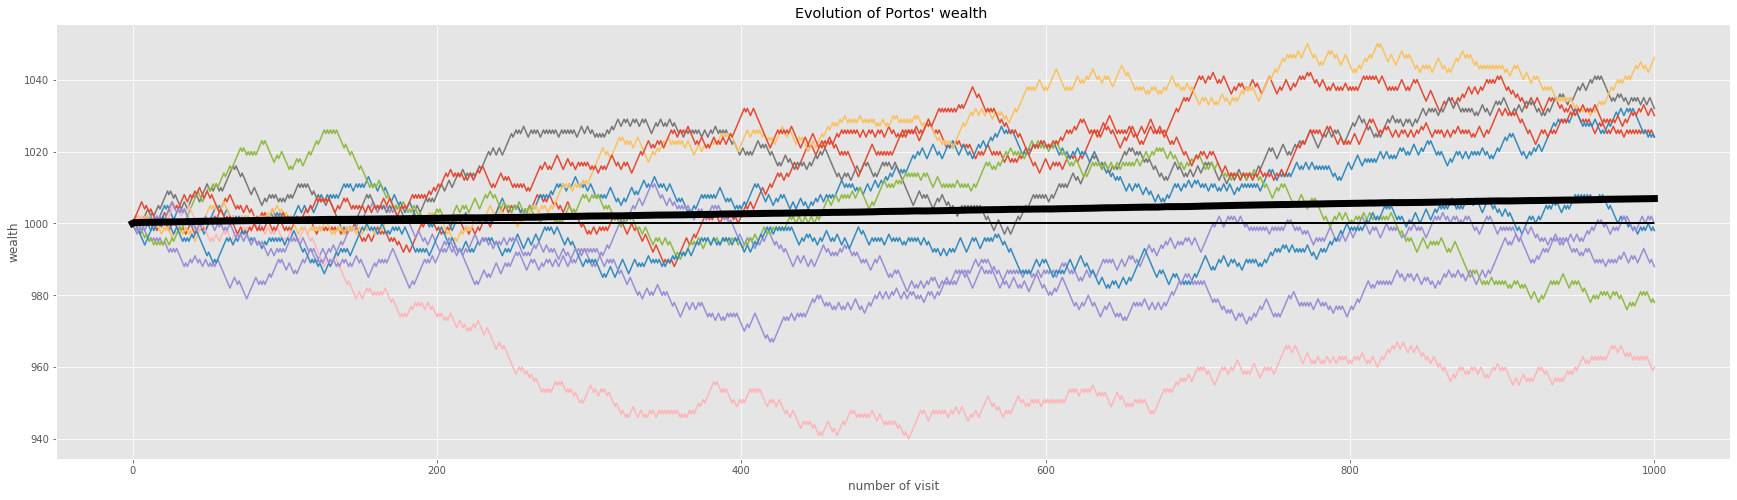

In [90]:
plt.figure(figsize=(30, 8))
plt.plot(aramis_sample[idxs[0]])
plt.plot(aramis_sample[idxs[1]])
plt.plot(aramis_sample[idxs[2]])
plt.plot(aramis_sample[idxs[3]])
plt.plot(aramis_sample[idxs[4]])
plt.plot(aramis_sample[idxs[5]])
plt.plot(aramis_sample[idxs[6]])
plt.plot(aramis_sample[idxs[7]])
plt.plot(aramis_sample[idxs[8]])
plt.plot(aramis_sample[idxs[9]])
plt.plot(mean_aram, lw=7, color='black')
plt.plot(thousand, lw=2, color='black')
plt.title("Evolution of Portos' wealth ")
plt.xlabel('number of visit')
plt.ylabel('wealth')
plt.show()

## Парадокс Берксона

In [227]:
np.random.seed(4)
nn = np.arange(80, 161, 5)
num_admitted = []
corrIn = []
corrOut = []

for n in np.arange(80, 161, 5):
    
    # generating scores 
    rus = np.random.normal(60, 100, 10000)
    math = np.random.normal(60, 100, 10000)
    scores = np.transpose(np.array([rus, math, rus + math]))

    # admission 
    admitted = np.transpose(scores[scores[:, 2] > n])
    not_admitted = np.transpose(scores[scores[:, 2] <= n])
    
    # number of admitted
    num_admitted.append(len(admitted[2]))
    
    # correlation among admitted
    corr_in = np.corrcoef(admitted[0:2])[1, 0]
    corrIn.append(corr_in)

    # correlation among left behind
    corr_out = np.corrcoef(not_admitted[0:2])[1, 0]
    corrOut.append(corr_out)

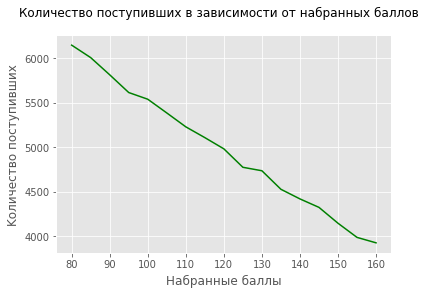

In [234]:
plt.plot(nn, num_admitted, 'g')
plt.xlabel('Hабранные баллы')
plt.ylabel('Kоличество поступивших')
plt.suptitle('Количество поступивших в зависимости от набранных баллов')
plt.show()

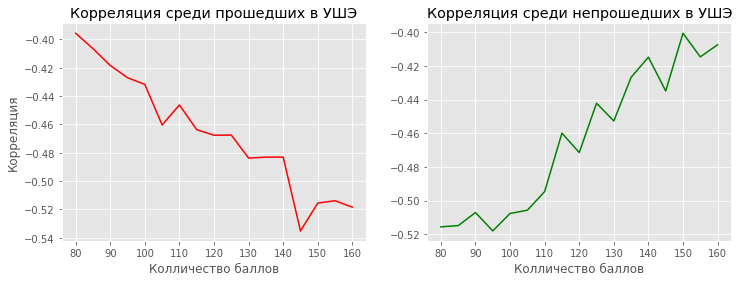

In [229]:
graph = plt.figure(3, figsize=(12, 4))

ax1 = graph.add_subplot(121)
ax1.plot(nn, corrIn,'r')
ax1.set_xlabel('Колличество баллов')
ax1.set_ylabel('Корреляция')
plt.title('Корреляция среди прошедших в УШЭ')


ax2 = graph.add_subplot(122)
ax2.plot(nn, corrOut,'g')
ax2.set_xlabel('Колличество баллов')
plt.title('Корреляция среди непрошедших в УШЭ')

plt.show()

## Парадокс Штайна

In [91]:
Nif_nif = np.random.normal(loc=60, scale=100, size=(10000, 100))
Naf_naf = np.random.normal(loc=70, scale=100, size=(10000, 100))
Nuf_nuf = np.random.normal(loc=80, scale=100, size=(10000, 100))

Найдем оценки максимального правдоподобия $\mu_{x}$, $\mu_{y}$, $\mu_{z}$ :

$L(X, \theta) = \frac{1}{(\sqrt(2\pi))^n}\frac{1}{(\sqrt(\sigma ^2))^n} e ^ \left(-\frac{\sum_{i=1}^{n}(X_i - \mu)^2}{2 \sigma^2}\right) \longrightarrow max_{\mu > 0}$ 
 
$\ln(X, \theta) = C + \frac{2}{2 \sigma ^2}\mu \sum_{i=1}^{n}X_i - \frac{1}{2 \sigma ^2}n\mu^2 \longrightarrow max_{\mu > 0}$

$\frac{\partial ln(X, \theta)}{\partial \mu} = \frac{\sum_{i=1}^{n}X_i}{ \sigma ^2} - \frac{n\mu}{\sigma ^2} = 0 $

Следовательно:

$\hat{\mu} = \frac{\sum_{i=1}^{n}X_i}{n} = \overline{X} $


In [92]:
mu_x = np.mean(Nif_nif, axis=1)
mu_y = np.mean(Naf_naf, axis=1)
mu_z = np.mean(Nuf_nuf, axis=1)
S = (mu_x - 60)**2 + (mu_y - 70)**2 + (mu_z - 80)**2

e_x = np.full(1300, 60)
e_y = np.full(1300, 70)
e_z = np.full(1300, 80)

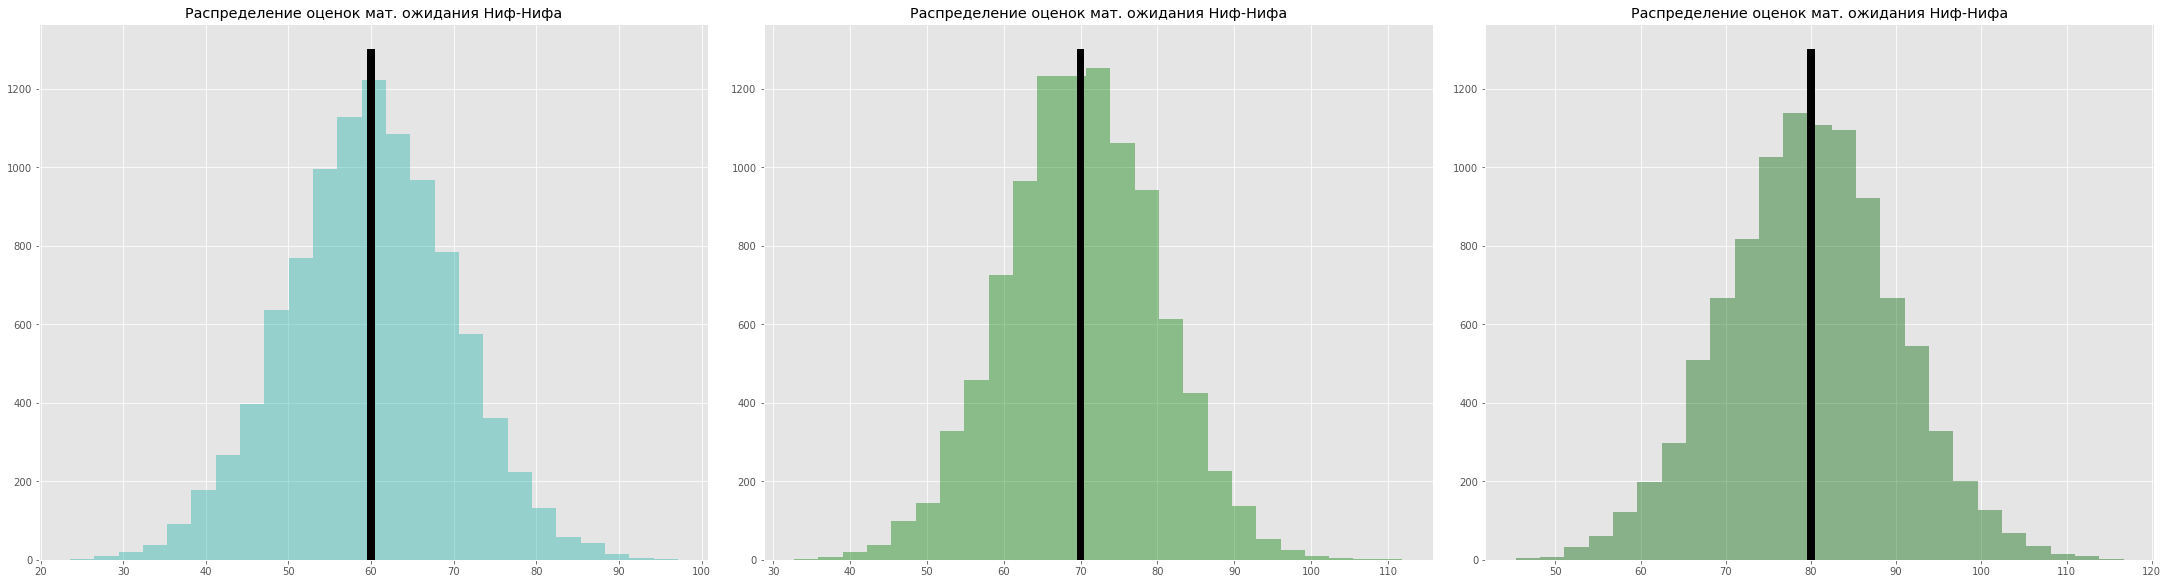

In [93]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, constrained_layout=True)
fig.set_size_inches(30, 8)
ax1.hist(mu_x, bins=25, color='lightseagreen', alpha=0.4)
ax1.hist(e_x, bins=1, color='black')
ax1.set_title("Распределение оценок мат. ожидания Ниф-Нифа")

ax2.hist(mu_y, bins=25, color='green', alpha=0.4)
ax2.hist(e_y, bins=1, color='black')
ax2.set_title("Распределение оценок мат. ожидания Ниф-Нифа")

ax3.hist(mu_z, bins=25, color='darkgreen', alpha=0.4)
ax3.hist(e_z, bins=1, color='black')
ax3.set_title("Распределение оценок мат. ожидания Ниф-Нифа")
plt.show()

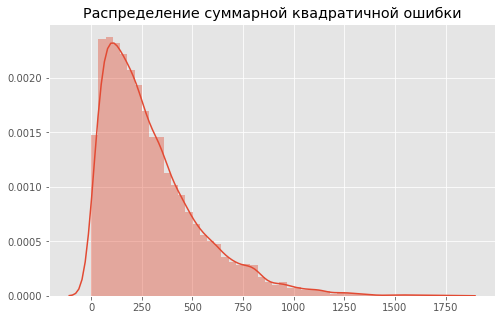

mean of S is 298.1192648461619


In [94]:
plt.figure(figsize=(8, 5))
sns.distplot(S)
plt.title("Распределение суммарной квадратичной ошибки")
plt.show()
print(f"mean of S is {np.mean(S)}")

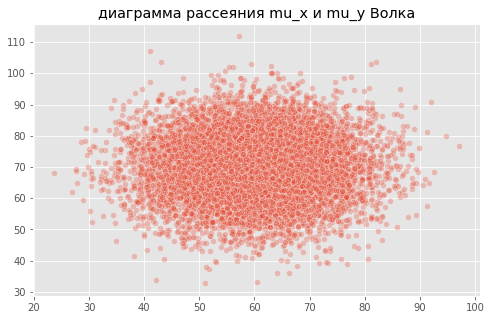

Корреляция 0.009599719014771755


In [105]:
plt.figure(figsize=(8, 5))
sns.scatterplot(mu_x, mu_y, alpha=0.3,)
plt.title("диаграмма рассеяния mu_x и mu_y Волка")
plt.show()
print(f" Корреляция {np.corrcoef(mu_x, mu_y)[1, 0]}")

In [96]:
def theta(mu):
    t = (1 - 1 / np.linalg.norm(mu)**2) * mu
    return t

mu = np.vstack((mu_x, mu_y, mu_z))
theta = theta(mu)

In [97]:
S_th = (theta[0] - 60)**2 + (theta[1] - 70)**2 + (theta[2] - 80)**2

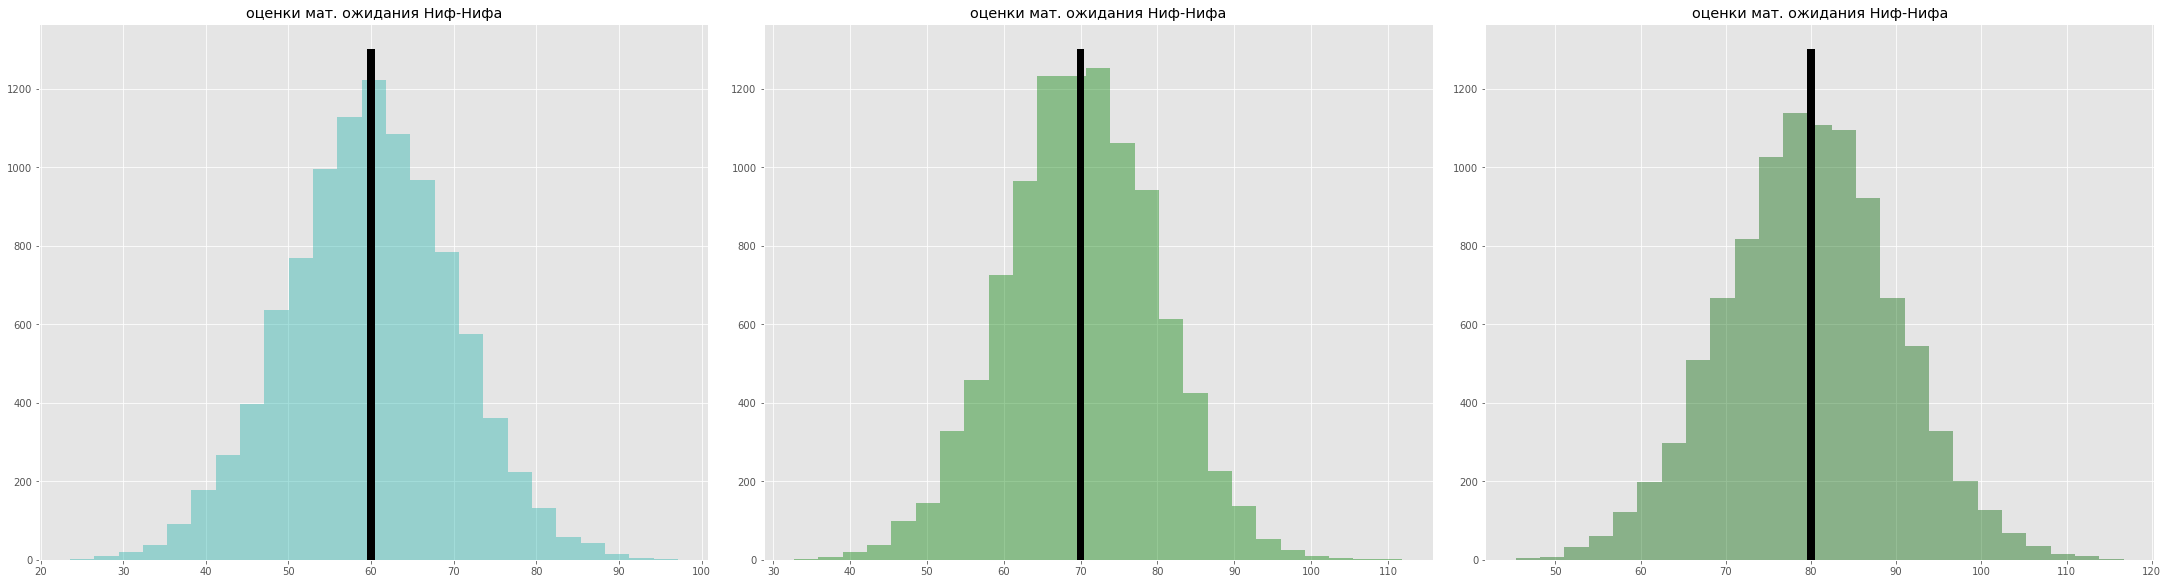

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, constrained_layout=True)
fig.set_size_inches(30, 8)
ax1.hist(theta[0], bins=25, color='lightseagreen', alpha=0.4)
ax1.hist(e_x, bins=1, color='black')
ax1.set_title("оценки мат. ожидания Ниф-Нифа")

ax2.hist(theta[1], bins=25, color='green', alpha=0.4)
ax2.hist(e_y, bins=1, color='black')
ax2.set_title("оценки мат. ожидания Ниф-Нифа")

ax3.hist(theta[2], bins=25, color='darkgreen', alpha=0.4)
ax3.hist(e_z, bins=1, color='black')
ax3.set_title("оценки мат. ожидания Ниф-Нифа")
plt.show()

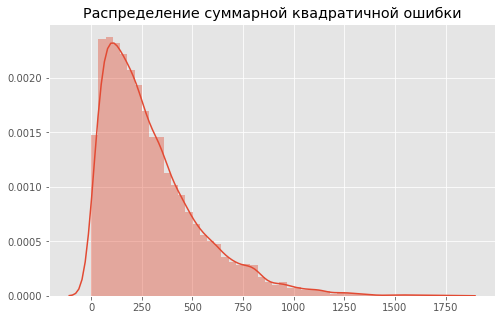

mean of S_th is 298.1192610294113


In [100]:
plt.figure(figsize=(8, 5))
sns.distplot(S_th)
plt.title("Распределение суммарной квадратичной ошибки")
plt.show()
print(f"mean of S_th is {np.mean(S_th)}")

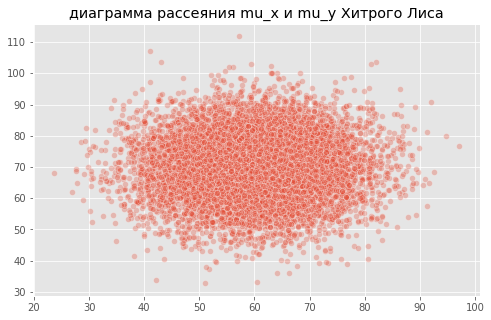

Корреляция 0.00959971901477176


In [104]:
plt.figure(figsize=(8, 5))
sns.scatterplot(theta[0], theta[1], alpha=0.3)
plt.title("диаграмма рассеяния mu_x и mu_y Хитрого Лиса")
plt.show()
print(f" Корреляция {np.corrcoef(theta[0], theta[1])[1, 0]}")

Накачанность Поросят точнее оценивает Хитрый Лис, однако отдельно для кажого Поросенка оценки Волка точнее 

In [102]:
print(np.mean(S_th) < np.mean(S))

True
